# Investors, optimal portfolios and indifference curves

In [1]:
from pyvest import InvestmentUniverse
from pyvest import YFDataReader

## Investment universe

### Download historical data

In [2]:
data_reader = YFDataReader()

assets = ["KO", "MSFT", "WMT"]
start_date = "1992-12-31"
end_date = "2022-12-31"

monthly_returns_df = data_reader.read_returns(assets, start_date, end_date)

In [9]:
type(monthly_returns_df)

pandas.core.frame.DataFrame

In [8]:
monthly_returns_df

,KO,MSFT,WMT
Date,,,
1993-01-31 00:00:00-05:00,1.194066,1.317739,1.757796
1993-02-28 00:00:00-05:00,0.000000,-3.612713,-0.191950
1993-03-31 00:00:00-05:00,0.982365,10.944479,-2.214563
1993-04-30 00:00:00-04:00,-7.624664,-7.567552,-15.748070
1993-05-31 00:00:00-04:00,5.396782,8.333329,4.205596
...,...,...,...
2022-08-31 00:00:00-04:00,-3.833563,-6.666299,0.815806
2022-09-30 00:00:00-04:00,-8.558689,-10.926696,-2.150134
2022-10-31 00:00:00-04:00,6.836832,-0.330610,9.737863


In [7]:
print(monthly_returns_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &         KO &       MSFT &        WMT \\
Date                      &            &            &            \\
\midrule
1993-01-31 00:00:00-05:00 &   1.194066 &   1.317739 &   1.757796 \\
1993-02-28 00:00:00-05:00 &   0.000000 &  -3.612713 &  -0.191950 \\
1993-03-31 00:00:00-05:00 &   0.982365 &  10.944479 &  -2.214563 \\
1993-04-30 00:00:00-04:00 &  -7.624664 &  -7.567552 & -15.748070 \\
1993-05-31 00:00:00-04:00 &   5.396782 &   8.333329 &   4.205596 \\
1993-06-30 00:00:00-04:00 &   4.049938 &  -4.993245 &  -5.716265 \\
1993-07-31 00:00:00-04:00 &   0.581337 & -15.909117 &  -3.333296 \\
1993-08-31 00:00:00-04:00 &   0.289108 &   1.520289 &   1.603479 \\
1993-09-30 00:00:00-04:00 &  -2.208269 &   9.816919 &  -4.368929 \\
1993-10-31 00:00:00-04:00 &   2.662730 &  -2.878741 &   7.106530 \\
1993-11-30 00:00:00-05:00 &  -2.778828 &  -0.155999 &   8.648733 \\
1993-12-31 00:00:00-05:00 &   6.249974 &   0.781251 & -12.663797 \\
1994-01-31 00:00:00-05:00 &  -8

C:\Users\patri\AppData\Local\Temp\ipykernel_26252\3978309350.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(monthly_returns_df.to_latex())


### Estimate expected returns and variance-covariance matrix

In [10]:
mu_hat = monthly_returns_df.mean()
cov_hat = monthly_returns_df.cov()

### Construct the investment universe

In [11]:
investment_universe = InvestmentUniverse(assets, mu_hat, cov_hat, r_f=0.25, min_weight=-0.5)

### Add investors

In [12]:
investment_universe.add_investor(2000, portfolio=[0.2, 0.3, 0.25, 0.25], gamma=0.015, name="Bob")
investment_universe.add_investor(5000, gamma=0.012)
investment_universe.add_investor(3000, gamma=0.025)
investment_universe.add_investor(6000, gamma=0.02)
investment_universe.add_investor(2500, gamma=0.025)

wealth: 2500.0
gamma: 0.025
portfolio:
  -weights: [0.2341, 0.3439, 0.1709, 0.251]
  -expected return: 1.0272
  -standard deviation: 3.9432
  -utility:: 0.6385345679685439

## Market portfolio

In [13]:
investment_universe.investors

{'Bob': wealth: 2000.0
 gamma: 0.015
 portfolio:
   -weights: {'KO': 0.2, 'MSFT': 0.3, 'WMT': 0.25, 'r_f': 0.25}
   -expected return: 0.994
   -standard deviation: 3.8112
   -utility:: 0.7761064908927032,
 'Investor 1': wealth: 5000.0
 gamma: 0.012
 portfolio:
   -weights: [0.4873, 0.7166, 0.3563, -0.5602]
   -expected return: 1.8692
   -standard deviation: 8.2147
   -utility:: 1.0594469802836242,
 'Investor 2': wealth: 3000.0
 gamma: 0.025
 portfolio:
   -weights: [0.2341, 0.3439, 0.1709, 0.251]
   -expected return: 1.0272
   -standard deviation: 3.9432
   -utility:: 0.6385345679685439,
 'Investor 3': wealth: 6000.0
 gamma: 0.02
 portfolio:
   -weights: [0.2925, 0.4299, 0.2136, 0.064]
   -expected return: 1.2214
   -standard deviation: 4.928
   -utility:: 0.7356682436239148,
 'Investor 4': wealth: 2500.0
 gamma: 0.025
 portfolio:
   -weights: [0.2341, 0.3439, 0.1709, 0.251]
   -expected return: 1.0272
   -standard deviation: 3.9432
   -utility:: 0.6385345679685439}

In [14]:
investment_universe.total_wealth

In [15]:
investment_universe.calculate_market_portfolio()

weights: {'KO': 0.3088, 'MSFT': 0.4546, 'WMT': 0.2366, 'r_f': 0.0}
expected return: 1.2842
standard deviation: 5.247

## Optimal portfolio

In [16]:
bob_investor = investment_universe.investors["Bob"]
bob_investor

wealth: 2000.0
gamma: 0.015
portfolio:
  -weights: {'KO': 0.2, 'MSFT': 0.3, 'WMT': 0.25, 'r_f': 0.25}
  -expected return: 0.994
  -standard deviation: 3.8112
  -utility:: 0.7761064908927032

In [17]:
bob_investor.portfolio_utility

0.7761064908927032

In [18]:
bob_investor.calculate_optimal_portfolio()

weights: [0.3902, 0.5729, 0.2849, -0.248]
expected return: 1.5449
standard deviation: 6.5694

In [19]:
bob_investor.optimal_portfolio_utility

0.8975575754847573

## Plot investment universe and indifference curves

### Plot investment universe

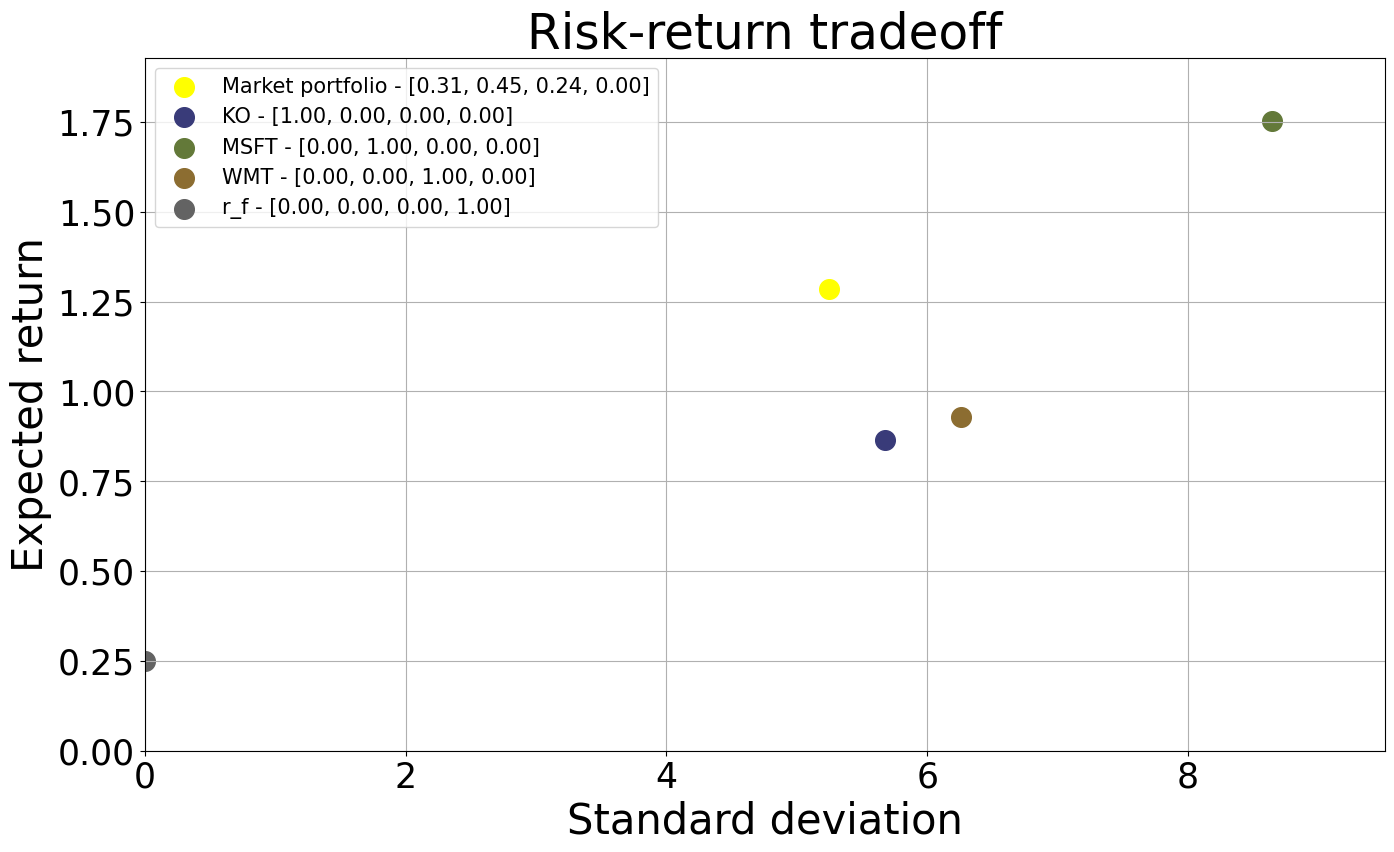

In [20]:
investment_universe.plot()

### Plot indifference curves

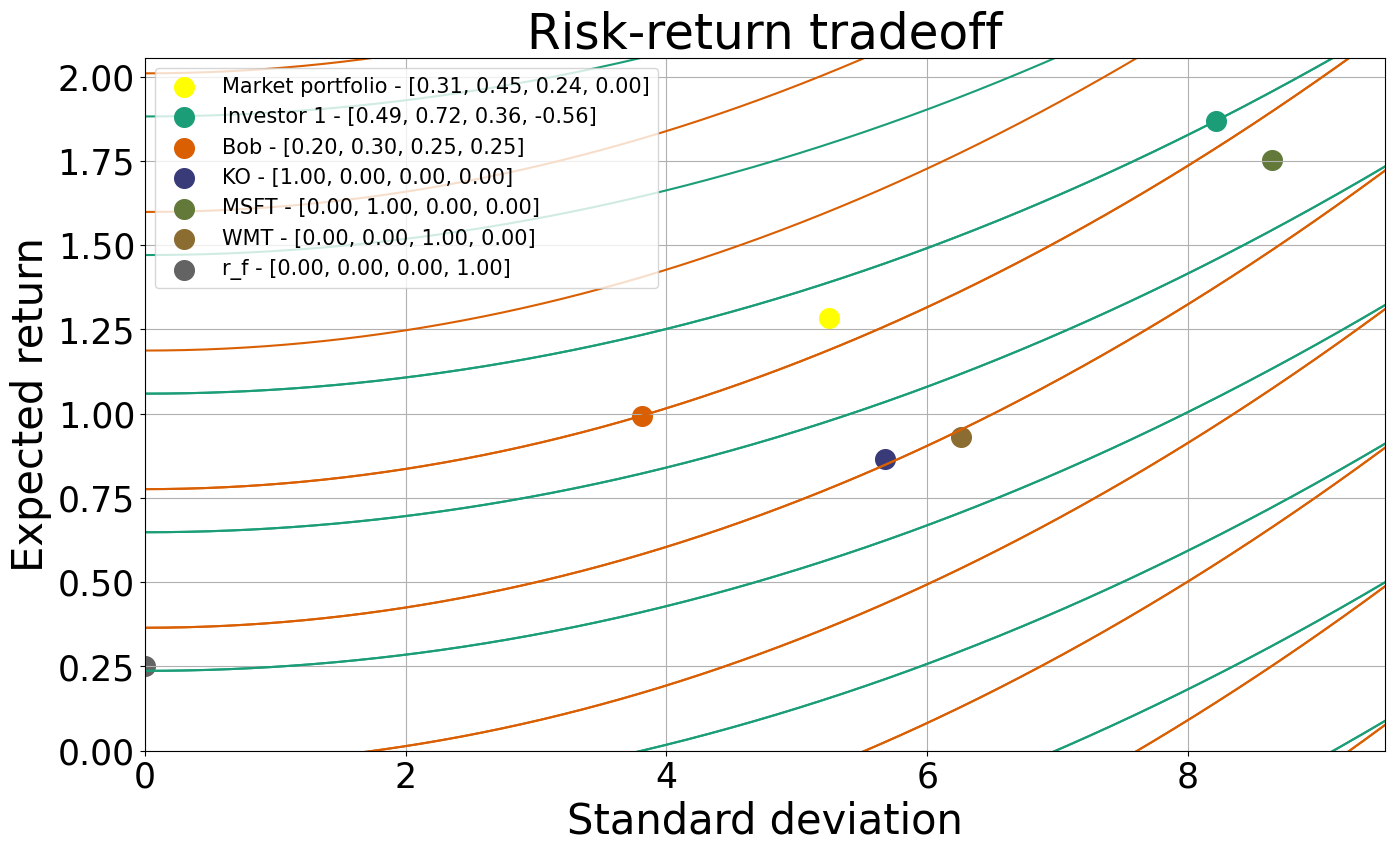

In [21]:
investment_universe.plot(investors=["Investor 1", "Bob"], indifference_curves=["Investor 1", "Bob"])

### Add portfolios

In [22]:
investment_universe.calculate_feasible_portfolios()

In [23]:
investment_universe.calculate_efficient_frontier()

In [24]:
investment_universe.calculate_mvp()

weights: {'KO': 0.4926, 'MSFT': 0.1558, 'WMT': 0.3516, 'r_f': 0.0}
expected return: 1.0262
standard deviation: 4.5535

In [25]:
investment_universe.calculate_tangency_portfolio()

weights: {'KO': 0.3126, 'MSFT': 0.4593, 'WMT': 0.2281, 'r_f': 0.0}
expected return: 1.2878
standard deviation: 5.2652

In [26]:
investment_universe.calculate_cal()

In [27]:
investment_universe.calculate_portfolio([0.0,0.4,0.3,0.3])

weights: {'KO': 0.0, 'MSFT': 0.4, 'WMT': 0.3, 'r_f': 0.3}
expected return: 1.0553
standard deviation: 4.3223

In [28]:
investment_universe.visualizer.nb_decimal_places = 2

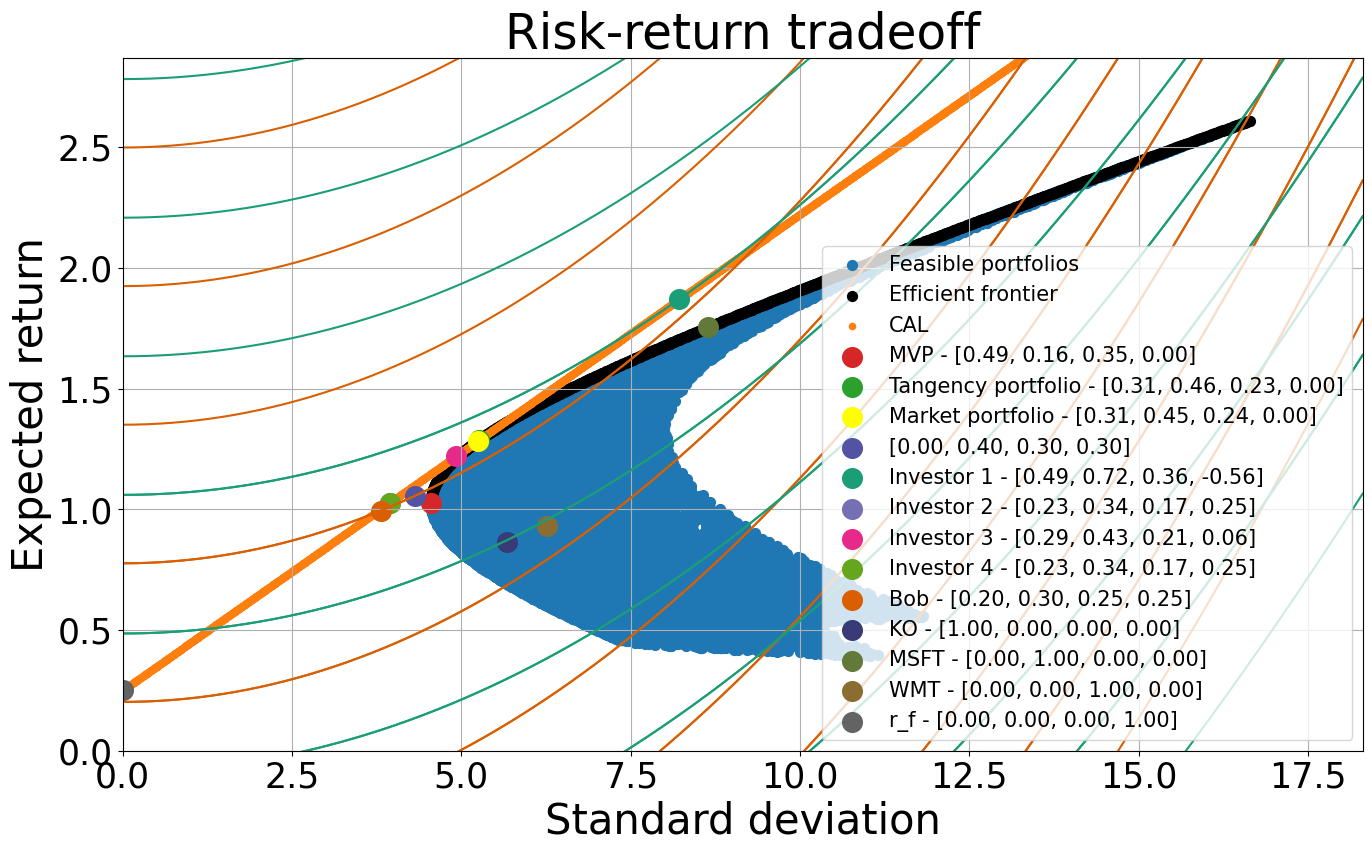

In [29]:
investment_universe.plot(investors=["Investor 1", "Investor 2", "Investor 3", "Investor 4", "Bob"], indifference_curves=["Bob", "Investor 1"], legend='best')

### Plot feasible portfolios with respect to the risk-free asset

In [30]:
investment_universe.calculate_feasible_portfolios_with_r_f()

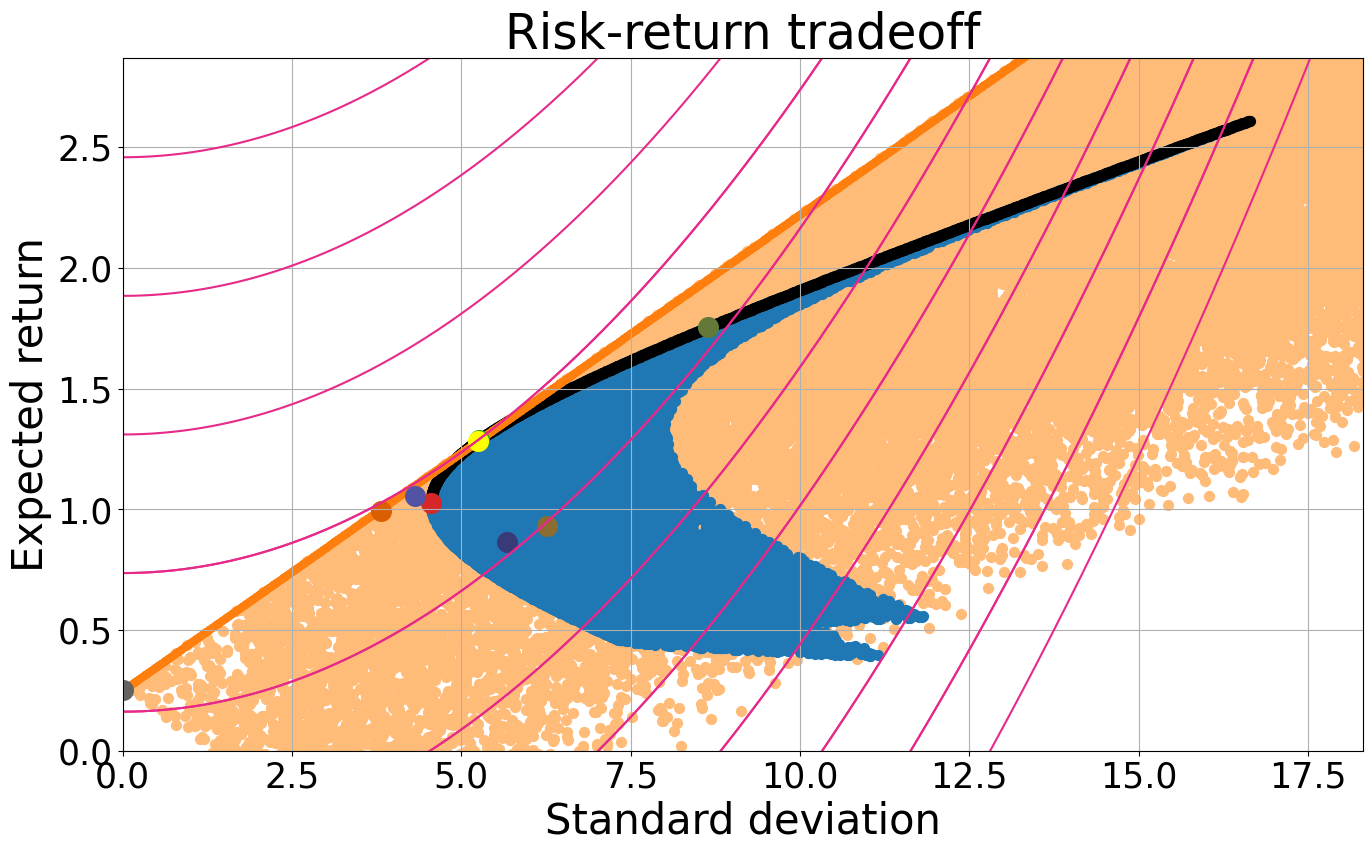

In [31]:
investment_universe.plot(investors=["Bob"], indifference_curves=["Investor 3"], legend=None)